In [6]:
import pandas as pd
data = pd.read_csv('imdb.csv')

In [7]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# Display basic information about the dataset
data.info()
data.isnull().sum()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


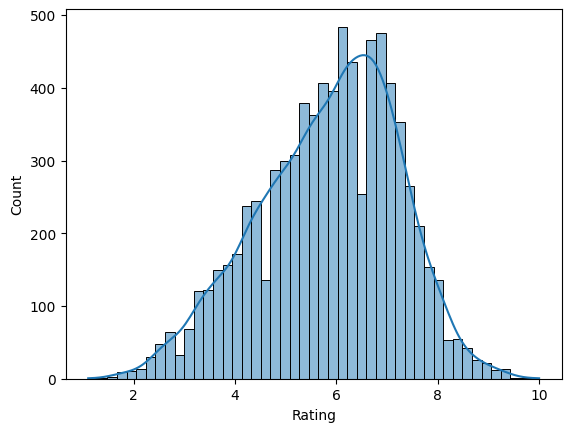

In [10]:
# Visualize the distribution of movie ratings
sns.histplot(data['Rating'], kde=True)
plt.show()

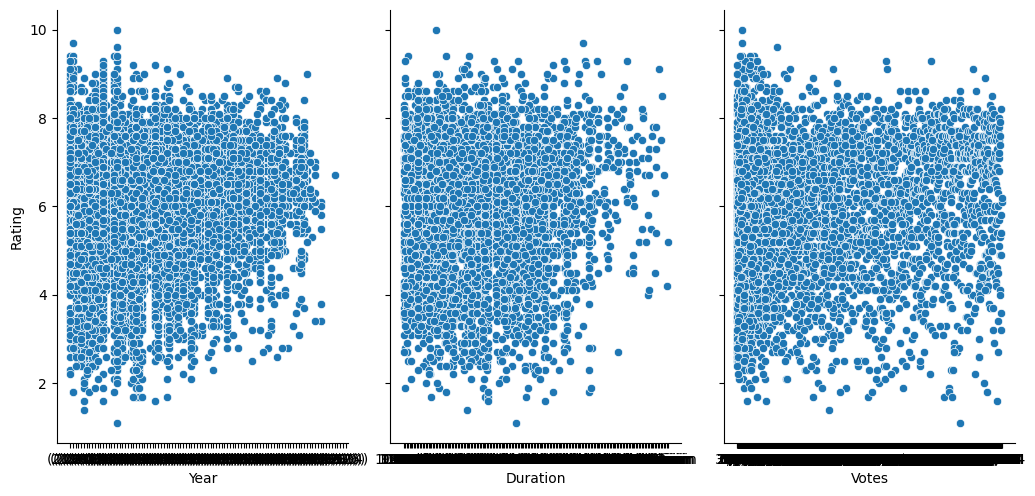

In [11]:
# Visualize the relationship between rating and other numerical features
sns.pairplot(data, x_vars=['Year', 'Duration', 'Votes'], y_vars='Rating', height=5, aspect=0.7)
plt.show()

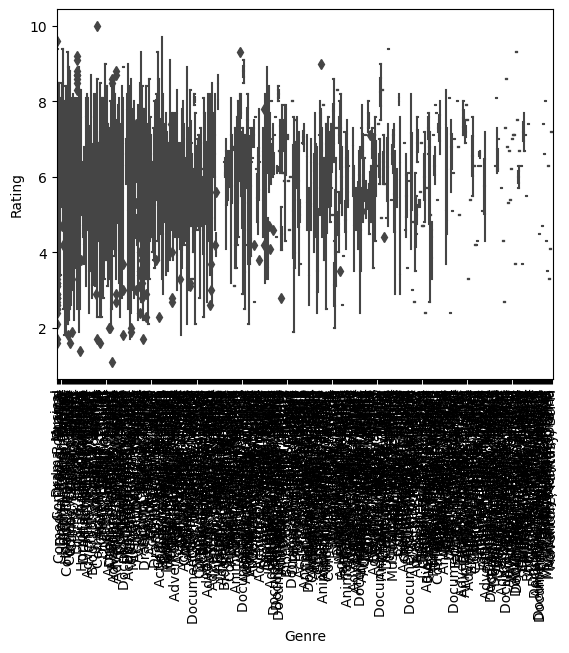

In [12]:
# Visualize the relationship between rating and categorical features
sns.boxplot(x='Genre', y='Rating', data=data)
plt.xticks(rotation=90)
plt.show()

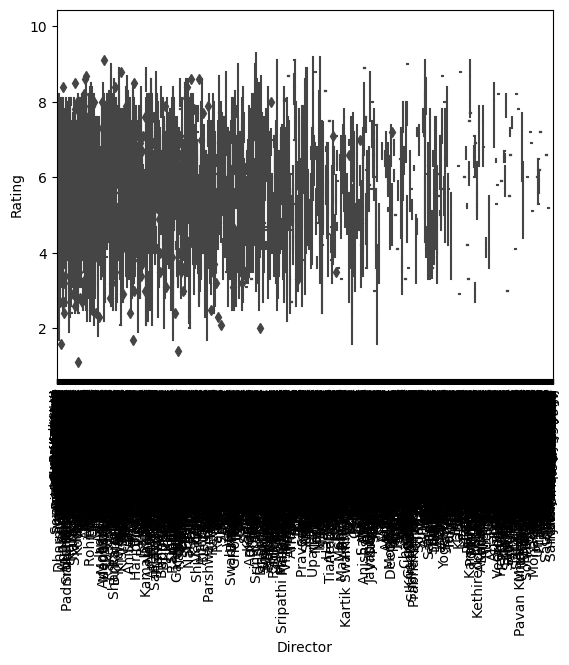

In [13]:
sns.boxplot(x='Director', y='Rating', data=data)
plt.xticks(rotation=90)
plt.show()

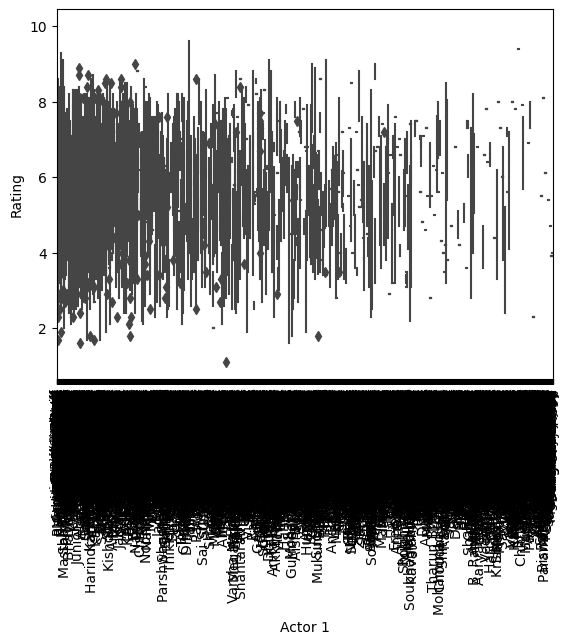

In [14]:
sns.boxplot(x='Actor 1', y='Rating', data=data)
plt.xticks(rotation=90)
plt.show()

In [15]:
#Data preprocessing
# Fill missing values
data['Genre'].fillna('Unknown', inplace=True)
data['Director'].fillna('Unknown', inplace=True)
data['Actor 1'].fillna('Unknown', inplace=True)
data['Actor 2'].fillna('Unknown', inplace=True)
data['Actor 3'].fillna('Unknown', inplace=True)
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

data.dropna(inplace=True)

numerical_features = ['Year', 'Duration', 'Votes']
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# Clean the 'Year' column and Display the cleaned 'Year' column Error solve
data['Year'] = data['Year'].str.extract('(\d{4})').astype(int)
print(data['Year'].head())


1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int32


In [32]:
#Feature selection and split the data
X = data.drop('Rating', axis=1)
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
#Build the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [34]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

#Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')


Root Mean Squared Error (RMSE): 1.1276856717990487
R^2 Score: 0.3164935611872268
